In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
f = open("algoparams_from_ui.json")
json = json.load(f)

In [3]:
json

{'session_name': 'test',
 'session_description': 'test',
 'design_state_data': {'session_info': {'project_id': '1',
   'experiment_id': 'kkkk-11',
   'dataset': 'iris_modified.csv',
   'session_name': 'test',
   'session_description': 'test'},
  'target': {'prediction_type': 'Regression',
   'target': 'petal_width',
   'type': 'regression',
   'partitioning': True},
  'train': {'policy': 'Split the dataset',
   'time_variable': 'sepal_length',
   'sampling_method': 'No sampling(whole data)',
   'split': 'Randomly',
   'k_fold': False,
   'train_ratio': 0,
   'random_seed': 0},
  'metrics': {'optomize_model_hyperparameters_for': 'AUC',
   'optimize_threshold_for': 'F1 Score',
   'compute_lift_at': 0,
   'cost_matrix_gain_for_true_prediction_true_result': 1,
   'cost_matrix_gain_for_true_prediction_false_result': 0,
   'cost_matrix_gain_for_false_prediction_true_result': 0,
   'cost_matrix_gain_for_false_prediction_false_result': 0},
  'feature_handling': {'sepal_length': {'feature_name'

In [4]:
for i in json["design_state_data"]:
    print(i)

session_info
target
train
metrics
feature_handling
feature_generation
feature_reduction
hyperparameters
weighting_stratergy
probability_calibration
algorithms


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [6]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.describe()                        

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.isnull().mean()*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [10]:
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:>

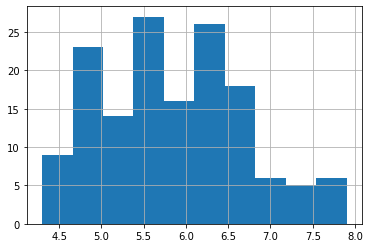

In [11]:
data["sepal_length"].hist()

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

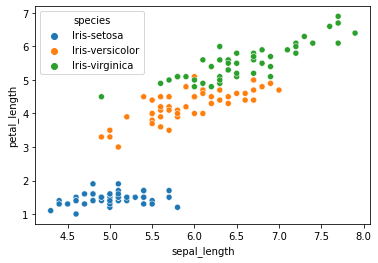

In [12]:
sns.scatterplot(data["sepal_length"], data["petal_length"], hue = data["species"])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

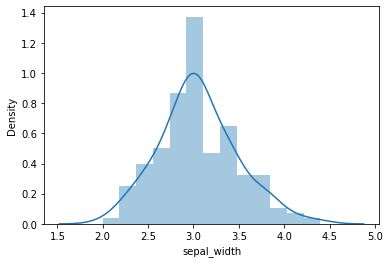

In [13]:
sns.distplot(data["sepal_width"])

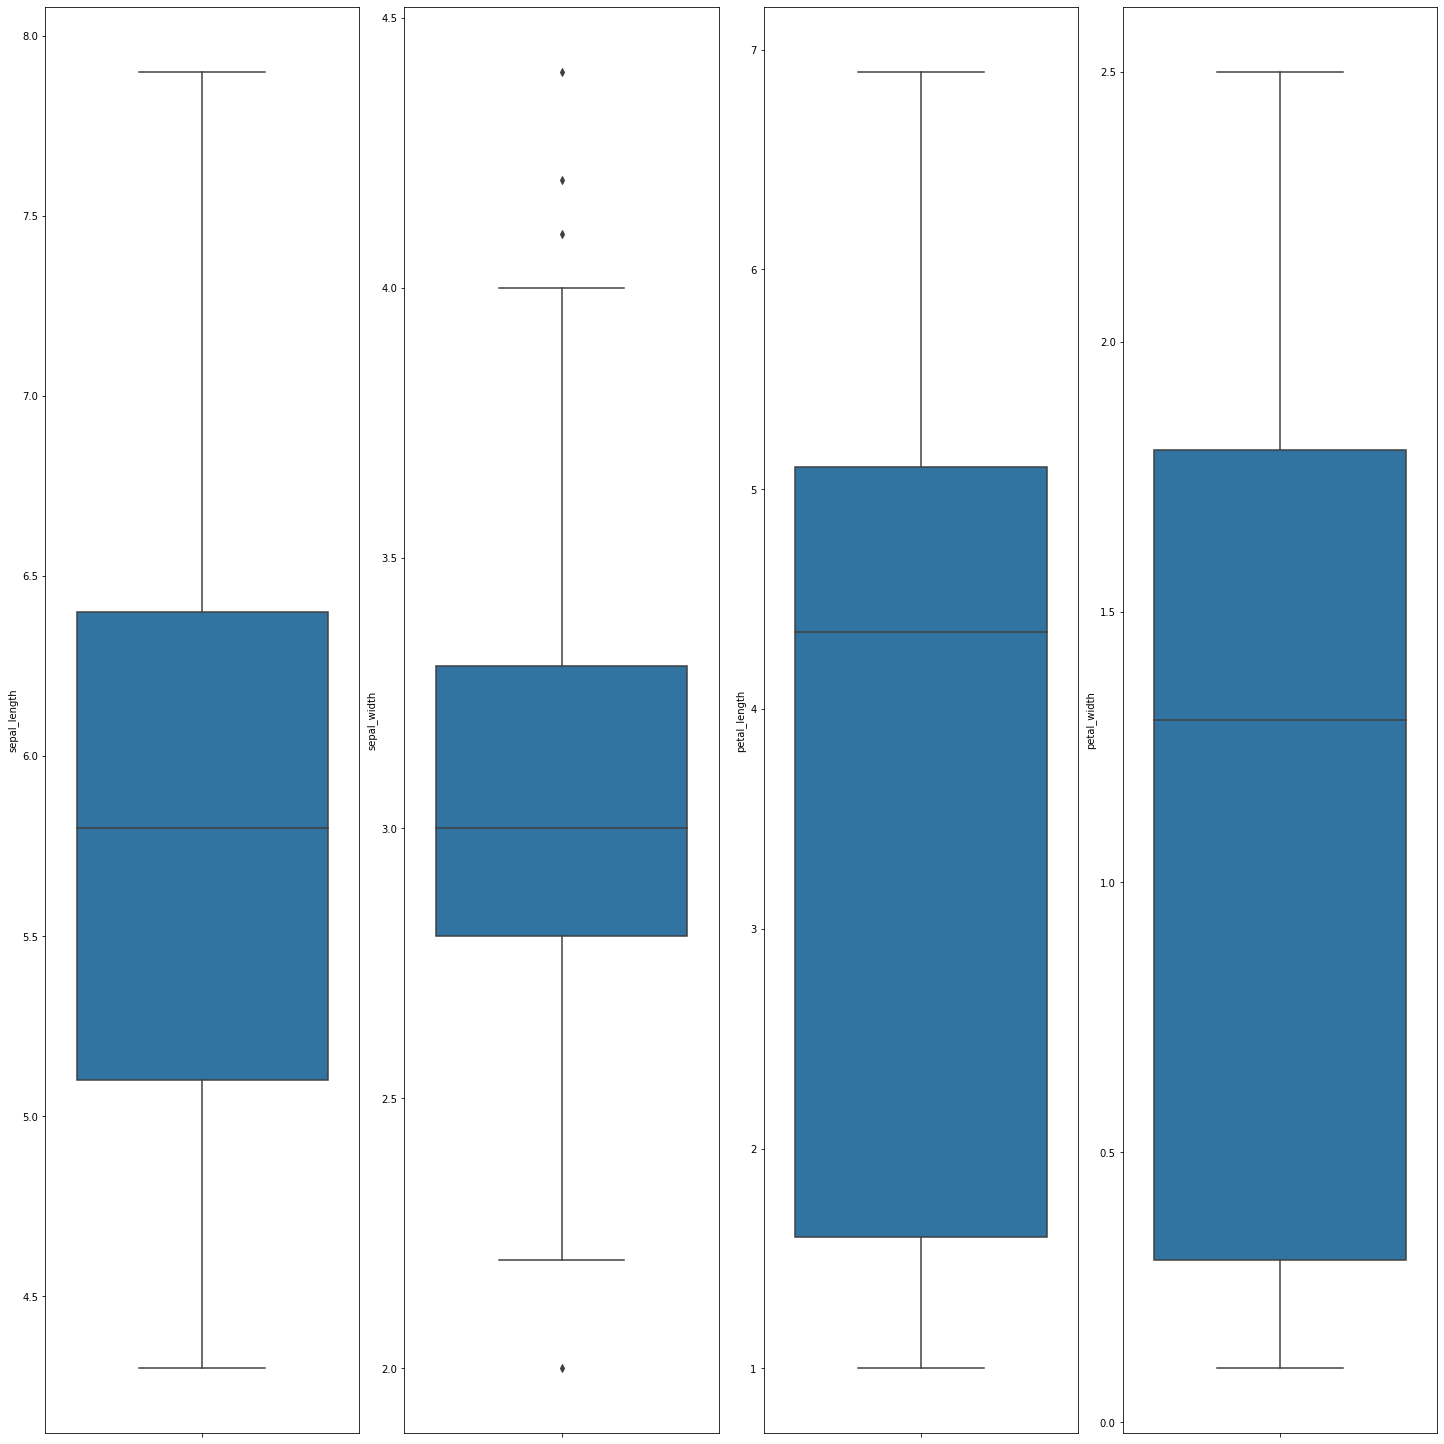

In [14]:
data1 = data.drop(columns=['species'], axis=1)

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [15]:
data["sepal_width"] = data[(data["sepal_width"] < data["sepal_width"].mean() + 3 * data["sepal_width"].std()) & (data["sepal_width"] > data["sepal_width"].mean() - 3 * data["sepal_width"].std())] 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   149 non-null    object 
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [17]:
data = data.dropna()

In [18]:
data.corr()

,sepal_length,petal_length,petal_width
sepal_length,1.000000,0.875204,0.819851
petal_length,0.875204,1.000000,0.962598
petal_width,0.819851,0.962598,1.000000


In [19]:
le = LabelEncoder()

data["species"] = le.fit_transform(data["species"])


In [20]:
x = data.drop(columns=["species"])
y = data["species"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=2, random_state=2) 

In [22]:
lor = LogisticRegression()

In [23]:
lor.fit(x_train,y_train)
pred = lor.predict(x_test)

In [24]:
accuracy_score(y_test,pred)*100

100.0

In [25]:
x = cross_val_score(LogisticRegression(),x_train,y_train,cv=10,scoring="accuracy")
print(np.round(np.mean(x),2)*100)

96.0


C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[[1 0]
 [0 1]]


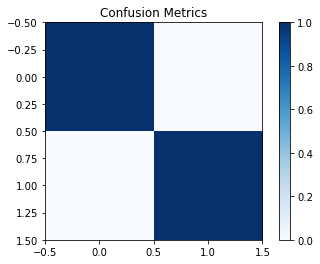

In [26]:
cm = confusion_matrix(y_test,pred)
print(cm)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Metrics")
plt.colorbar()